In [36]:
#\-- IMPORT MODULES, CLASSES AND METHODS --/#

import zipfile                          #############################
import os                               # || FILE SYSTEM / UTILS || #
import copy                             #############################
from prettytable import PrettyTable
import copy

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

import numpy as np                  ###################################
import pandas as pd                 # || EXPLORATIVE DATA ANALYSIS || #
import matplotlib.pyplot as plt     ###################################
import seaborn as sns
import matplotlib
# https://towardsdatascience.com/handling-missing-data-like-a-pro-part-3-model-based-multiple-imputation-methods-bdfe85f93087 NumPyro, impyute,

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

import sklearn
import re
import importlib
import time

from Pruned import PrunedCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn import naive_bayes                         #########################
from sklearn import neural_network                      #  |-----------------|  #
from sklearn import svm                                 # || MODEL SELECTION || #
from sklearn import tree                                #  |-----------------|  #
from sklearn import linear_model                        #########################

# from PrunedCV import PrunedCV

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold     ##########################
from sklearn.model_selection import ParameterGrid       # || MODEL VALIDATION || #
                                                        ##########################
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.datasets import make_classification

from preprocessing import Preprocessing

%matplotlib inline


from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import re
from datetime import datetime, timedelta

In [37]:
#\-- SET ENVIRONMENT --/#
# Before starting we need to store the data properly. We define an ad-hoc folder where we will store everything.
main_PATH = os.getcwd()

# We check whether we already have the data.                        
if 'data' not in os.listdir():                                      
                                                                    
    # Unzip files.
    with zipfile.ZipFile(r'summer_project_dataset.zip') as zip_ref:

        os.mkdir(main_PATH + '/data')   # We create the 'data' directory,
        os.chdir(main_PATH + '/data')   # we change directory,
    
        data_PATH = os.getcwd()         # we get the data path
        zip_ref.extractall(data_PATH)   # and we unzip there.       #####################
                                                                    # || FILE SYSTEM || #    
    file_PATH = data_PATH + '/summer_project_dataset'               #####################

else:

    # We just build the paths.
    data_PATH = main_PATH + '/data'
    file_PATH = data_PATH + '/summer_project_dataset'

# Finally, we go back to our main path.
os.chdir(main_PATH)

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# We also set a seed for reproducibility purposes.      #####################
SEED = 42                                               # || RANDOM SEED || #
np.random.seed(SEED)                                    #####################

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# LaTeX style plots.
plt.rcParams['figure.figsize'] = (12, 8)
# plt.rcParams['text.usetex']    = True         ############################
# plt.rcParams['font.family']    = 'serif'      # || DEFAULT PARAMETERS || #
# plt.rcParams['font.size']      = '10'         ############################

pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_rows', 10)

In [38]:
#\-- DATASET LOADING AND PREPROCESSING --/#
# Aome variables are stored as float, but they are actually int. Two reasons why:
#       -) nan values are considered as float --> first estimate them and then change the data type.
#       -) there are inconsistencies, especially in kw_max_min where some int values are float instead.
# for the moment just let's store everything as float, but further inspections are needed.

data_types = {
              'url' : str, 'timedelta' : int, 'shares' : int, 'data_channel' : str, 'weekday' : str, 
              
              'n_tokens_title'          : int, 'n_tokens_content'       : int, 'n_unique_tokens' : float, 'n_non_stop_words' : float,
              'n_non_stop_unique_tokens': float, 'average_token_length' : float,

              'num_hrefs' : int, 'num_self_hrefs' : int, 'num_imgs' : float, 'num_videos' : float,
              
              'kw_min_min' : float, 'kw_max_min' : float, 'kw_avg_min' : float, 'kw_min_max' : float, 'kw_max_max'   : float,
              'kw_avg_max' : float, 'kw_min_avg' : float, 'kw_max_avg' : float, 'kw_avg_avg' : float, 'num_keywords' : float,
              
              'self_reference_min_shares' : float, 'self_reference_max_shares' : float, 'self_reference_avg_sharess' : float,
              
              'LDA_00' : float, 'LDA_01' : float, 'LDA_02' : float, 'LDA_03' : float, 'LDA_04' : float,
              
              'global_subjectivity' : float, 'global_sentiment_polarity' : float, 'global_rate_positive_words' : float, 'global_rate_negative_words' : float,
              
              'rate_positive_words' : float, 'rate_negative_words' : float,
              
              'avg_positive_polarity' : float, 'min_positive_polarity' : float, 'max_positive_polarity' : float, 'avg_negative_polarity' : float,
              'min_negative_polarity' : float, 'max_negative_polarity' : float,

              'title_subjectivity' : float, 'title_sentiment_polarity' : float, 'abs_title_subjectivity' : float, 'abs_title_sentiment_polarity' : float,
              }                                                    
                                                                   
                                                                   
df = pd.read_csv(file_PATH + r'/development.csv',                 
                   usecols = lambda column: column != 'id', dtype = data_types)

# Train/Validation/Test split

In [39]:

X = df.drop(['shares'], axis=1)
y = df['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 3000, random_state = 42)
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 2000, random_state = 42)


In [6]:
# print(f'Initial data: {df.shape[0]}\nTrain set size: {X_train.shape[0]}\t\t({(X_train.shape[0] / df.shape[0]) * 100:.2f}%)\n\
# Validation set size: {X_validation.shape[0]}\t({(X_validation.shape[0] / df.shape[0]) * 100:.2f}%)\n\
# Test set size: {X_test.shape[0]}\t\t({(X_test.shape[0] / df.shape[0]) * 100:.2f}%)')

We choose these proportions for three important reasons:
* More training data for more complex models
* The validation data are not that important, we need them just to tune the hyperparameters.
* The test data are more important in order to evaluate the model, so we need more of them.

# Preprocess data

In [40]:
def preprocess(X, y, p = PCA, train = True, means: dict = {}):
    
        if train:
            X['shares'] = y
            # X = copy.deepcopy(X[(X['shares'] > 300) & (X['shares'] < 6000)])
            # y = copy.deepcopy(y[(y > 300) & (y < 6000)])
            X = copy.deepcopy(X[X['shares'] < 12000])
            y = copy.deepcopy(y[y < 12000])
            X = X.drop('shares', axis = 1)

        conditions = [
                (np.log1p(X['kw_avg_max']) < 2),
                ((np.log1p(X['kw_avg_max']) < 11) & (np.log1p(X['kw_avg_max']) > 0)),
                (np.log1p(X['kw_avg_max']) > 11)
                ]

        labels = ['kw_avg_max_none', 'kw_avg_max_medium', 'kw_avg_max_high']

        columns_to_fill = ['num_imgs', 'num_videos', 'num_keywords']
        dict_means = {}

        if train:
            X[columns_to_fill] = X[columns_to_fill].fillna(X[columns_to_fill].mean())
            dict_means = {'num_imgs'     : X['num_imgs'].mean(),
                          'num_videos'   : X['num_videos'].mean(),
                          'num_keywords' : X['num_keywords'].mean()}
        
        else:
            X = X.fillna(means)

        X['kw_avg_max'] = np.where(conditions[0], labels[0],
                                np.where(conditions[1], labels[1],
                                            np.where(conditions[2], labels[2], None)))
    
        X['weekday'] = np.where(X['weekday'].isin(['monday', 'tuesday', 'wednesday', 'thursday', 'friday']), 'Not Weekend', 'Weekend')
        
        if train:
            y = y[X['n_tokens_content'] != 0]
            X = X[X['n_tokens_content'] != 0]

            y = y[np.log1p(X['num_hrefs']) < 4]
            y = y[np.log1p(X['num_self_hrefs']) < 3]
            y = y[X['self_reference_avg_sharess'] < 50000]
            
            X = X[np.log1p(X['num_hrefs']) < 4]
            X = X[np.log1p(X['num_self_hrefs']) < 3]
            X = X[X['self_reference_avg_sharess'] < 50000]
            
        X['title_sentiment_polarity'] = pd.cut(X['title_sentiment_polarity'],
                                            bins=[-1.00001, -0.5, -0.000000001, +0.000000001, 0.5, 1],
                                            labels=['high_negative_polarity', 'low_negative_polarity', 'neutral_polarity', 'low_positive_polarity', 'high_positive_polarity'],
                                            right = True)
        
        X['title_subjectivity'] = pd.cut(X['title_subjectivity'],
                                        bins = [-0.000001, 0.000001, 0.334, 0.667, 1],
                                        labels = ['no_subjectivity', 'low_subjectivity', 'medium_subjectvity', 'high_subjectivity'],
                                        right = True)

        # X_processed = X.drop(['kw_max_min', 'kw_max_avg', 'kw_min_min', 'url', 'timedelta', 'n_non_stop_words',
        #                     'n_tokens_content', 'n_non_stop_unique_tokens', 'self_reference_max_shares',
        #                     'self_reference_min_shares', 'rate_positive_words', 'rate_negative_words',
        #                     'max_positive_polarity', 'min_positive_polarity', 'min_negative_polarity',
        #                     'max_negative_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity',
        #                     'kw_min_max', 'kw_max_max', 'kw_min_avg'], axis = 1)
        
        X_processed = X.drop(['kw_max_min', 'kw_max_avg', 'kw_min_min', 'n_non_stop_words',
                            'n_tokens_content', 'n_non_stop_unique_tokens', 'self_reference_max_shares',
                            'self_reference_min_shares', 'rate_positive_words', 'rate_negative_words',
                            'max_positive_polarity', 'min_positive_polarity', 'min_negative_polarity',
                            'max_negative_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity',
                            'kw_min_max', 'kw_max_max', 'kw_min_avg'], axis = 1)

        X_processed['num_hrefs'] = np.log1p(X_processed['num_hrefs'])
        X_processed['num_self_hrefs'] = np.log1p(X_processed['num_self_hrefs'])
        X_processed['num_imgs'] = np.log1p(X_processed['num_imgs'])
        X_processed['num_videos'] = np.log1p(X_processed['num_videos'])
        X_processed['kw_avg_min'] = np.log1p(X_processed['kw_avg_min'] + 1)
        X_processed['kw_avg_avg'] = np.log1p(X_processed['kw_avg_avg'])
        X_processed['self_reference_avg_sharess'] = np.log1p(X_processed['self_reference_avg_sharess'])
        
        y_processed = np.log(y)
        

        one_hot_encoded = pd.get_dummies(X_processed['data_channel'])

        # Concatenate the one-hot encoded columns with the original DataFrame
        X_processed = pd.concat([X_processed, one_hot_encoded], axis = 1)
        X_processed  = X_processed.drop('data_channel', axis = 1)

        one_hot_encoded = pd.get_dummies(X_processed['weekday'])

        # Concatenate the one-hot encoded columns with the original DataFrame
        X_processed = pd.concat([X_processed, one_hot_encoded], axis = 1)
        X_processed  = X_processed.drop('weekday', axis = 1)

        one_hot_encoded = pd.get_dummies(X_processed['kw_avg_max'])

        # Concatenate the one-hot encoded columns with the original DataFrame
        X_processed = pd.concat([X_processed, one_hot_encoded], axis = 1)
        X_processed  = X_processed.drop('kw_avg_max', axis = 1)

        one_hot_encoded = pd.get_dummies(X_processed['title_subjectivity'])

        # Concatenate the one-hot encoded columns with the original DataFrame
        X_processed = pd.concat([X_processed, one_hot_encoded], axis = 1)
        X_processed  = X_processed.drop('title_subjectivity', axis = 1)

        one_hot_encoded = pd.get_dummies(X_processed['title_sentiment_polarity'])

        # Concatenate the one-hot encoded columns with the original DataFrame
        X_processed = pd.concat([X_processed, one_hot_encoded], axis = 1)
        X_processed  = X_processed.drop('title_sentiment_polarity', axis = 1)

        categorical_features = ['high_negative_polarity', 'low_negative_polarity', 'neutral_polarity', 'low_positive_polarity', 'high_positive_polarity',
                                'no_subjectivity', 'low_subjectivity', 'medium_subjectvity', 'high_subjectivity',
                                'Not Weekend', 'Weekend',
                                'kw_avg_max_none', 'kw_avg_max_medium', 'kw_avg_max_high']
        
        X_processed.loc[:, categorical_features] = X_processed.loc[:, categorical_features].astype(int)
        
        # if train:

        #     p = PCA(n_components = 0.90)
        #     temp = copy.deepcopy(X_processed)
        #     X_processed = p.fit_transform(temp)
        
        # else:

        #     temp = copy.deepcopy(X_processed)
        #     X_processed = p.transform(temp)


        return X_processed, y_processed, dict_means, p


In [41]:
pr_X_train, pr_y_train, means, _ = preprocess(X_train, y_train)

In [14]:
tot_train = copy.deepcopy(X).select_dtypes(exclude=['object'])
tot_train['shares'] = y
tot_train.corr()['shares'][np.abs(tot_train.corr()['shares']) < 0.005]

num_self_hrefs               -0.001116
kw_min_min                   -0.002783
kw_min_max                    0.004461
LDA_00                       -0.003499
global_sentiment_polarity     0.003121
global_rate_positive_words    0.000719
rate_negative_words          -0.000889
min_positive_polarity         0.001528
abs_title_subjectivity       -0.003274
Name: shares, dtype: float64

In [8]:
# pr_X_validation, pr_y_validation, _ = preprocess(X_validation, y_validation, means, train = False)

In [6]:

# # DROP FEATURES
# drop_features = ['kw_max_min', 'kw_max_avg', 'kw_min_min', 'url', 'timedelta', 'n_non_stop_words',
#                 'n_tokens_content', 'n_non_stop_unique_tokens', 'self_reference_max_shares',
#                 'self_reference_min_shares', 'rate_positive_words', 'rate_negative_words',
#                 'max_positive_polarity', 'min_positive_polarity', 'min_negative_polarity',
#                 'max_negative_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity',
#                 'kw_min_max', 'kw_max_max', 'kw_min_avg']
# drop_indices = [mapping[value] for value in drop_features]

# # -------------------------------------------------------------------------------------------------------------------------------------------

# # APPLY LOGARITHMS
# log1p_features = ['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_avg_min', 'kw_avg_avg', 'self_reference_avg_sharess']
# log1p_indices = [mapping[value] for value in log1p_features]

# log_feature = ['shares']
# log_index = [mapping[value] for value in log_feature]

# # -------------------------------------------------------------------------------------------------------------------------------------------

# # DISCRETIZE KW_AVG_MAX
# conditions = [
#               (np.log1p(df['kw_avg_max']) < 2),
#               ((np.log1p(df['kw_avg_max']) < 11) & (np.log1p(df['kw_avg_max']) > 0)),
#               (np.log1p(df['kw_avg_max']) > 11)
# ]

# labels = ['kw_avg_max_none', 'kw_avg_max_medium', 'kw_avg_max_high']

# df['kw_avg_max'] = np.where(conditions[0], labels[0],
#                             np.where(conditions[1], labels[1],
#                                      np.where(conditions[2], labels[2], None)))

# # ------------------------------------------------------------------------------------------------------------------------------------------

# # DISCRETIZE TITLE_SUBJECTIVITY AND TITLE_SENTIMENT_POLARITY
# subjectivity_bin_values = {
#                            1 : 'no_subjectivity',
#                            2 : 'low_subjectivity',
#                            3 : 'medium_subjectvity',
#                            4 : 'high_subjectivity'
#                           }

# subjectivity_bins = [-0.000001, 0.000001, 0.334, 0.667, 1]


# df['title_sentiment_polarity'] = pd.cut(df['title_sentiment_polarity'],
#                                         bins=[-1.00001, -0.5, -0.000000001, +0.000000001, 0.5, 1],
#                                         labels=['high_negative_polarity', 'low_negative_polarity', 'neutral_polarity', 'low_positive_polarity', 'high_positive_polarity'],
#                                         right = True)

# polarity_bin_values = {
#                            1 : 'high_negative_polarity',
#                            2 : 'low_negative_polarity',
#                            3 : 'neutral_polarity',
#                            4 : 'low_positive_polarity',
#                            5 : 'high_positive_polarity'
#                           }

# polarity_bins = [-1.00001, -0.5, -0.000000001, +0.000000001, 0.5, 1]

# # Define a function to assign values to bins
# def discretize_title_subjectivity(X):
#     bin_indices = np.digitize(X[:, 0], subjectivity_bins, right = True)
#     bin_labels = np.array([subjectivity_bin_values[i] for i in bin_indices]).reshape(-1, 1)
#     return bin_labels

# def discretize_title_sentiment_polarity(X):
#     bin_indices = np.digitize(X[:, 0], polarity_bins, right = True)
#     bin_labels = np.array([polarity_bin_values[i] for i in bin_indices]).reshape(-1, 1)
#     return bin_labels

# # ------------------------------------------------------------------------------------------------------------------------------------------

# # DISCRETIZE WEEKDAY
# df['weekday'] = np.where(df['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'Not Weekend', 'Weekend')

# # ------------------------------------------------------------------------------------------------------------------------------------------

# # APPLY PIPLINE
# preprocessing_pipeline = Pipeline([
#     ('preprocessing', ColumnTransformer([                                                                             # Drop useless/correlated features.
#         ('log1p', FunctionTransformer(func = np.log1p, inverse_func = np.expm1, validate = False), log1p_indices),  # Apply log1p.
#         ('log', FunctionTransformer(func = np.log, inverse_func = np.exp, validate = False), log_index),            # Apply logp.
#         ('discretize_subjectivity', FunctionTransformer(func = discretize_title_subjectivity, validate = False), [42]),
#         ('discretize_sentiment_polarity', FunctionTransformer(func = discretize_title_sentiment_polarity, validate = False), [43]),
#         ('onehot', OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore'), [18, 42, 43, 46, 47]),
#         ("columnDropper", columnDropperTransformer, drop_features)],
#     remainder = 'passthrough'))
#     ])



In [7]:
from sklearn.model_selection import KFold
from Pruned import PrunedCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import xgboost as xgb

#\-- A BIT OF TUNING AND THEN SELECTION --/#

# We first define the grid of parameters. We need to specify both the values AND the name of the classifier because it will be of use
# when picking the right ones.
# param_grid = {

#     'sklearn.ensemble.GradientBoostingRegressor': {                            # Here we specify only the SVM, but there should be a lot of other configurations.
#                 'learning_rate': [0.05, 0.1, 0.15],
#                 'n_estimator': [100, 300, 500, 1000, 2000],
#                 'min_samples_leaf' : [5, 15, 20],
#                 'min_weight_fraction_leaf' : [0.0, 0.1, 0.2],
#                 'max_depth' : [2, 3, 4, 5],
#                 'subsample' : [0.5, 0.75, 1.0],
#                 'min_samples_split' : [2, 5, 10, 20],
#                 'max_features' : ['auto', 'sqrt', 'log2']           
#                }                                     
             
#              }

param_grid = {

    'sklearn.svm.SVR': {      
        
        'kernel'    : ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree'    : [2, 3, 4],
        'gamma'     : ['scale', 'auto'],
        'C'         : [0.1, 0.5, 1, 1.5, 2],
        'epsilon'   : [0.1, 0.5, 1, 1.5, 2],
        'shrinking' : [True, False],
        'verbose'   : [True]               
               },
    
                                      
             
             }

scores      = [mean_squared_error] # List of scores we want to compute, e.g. accuracy_score, f1_score, ... They must be methods.
THRESH_SKIP = 2
THRESH_PERCENTAGE = 0.95
MAIN_SCORE = 'mean_squared_error'

# Create a StratifiedKFold object for Cross Validation and perform the train/test split.
skf = KFold(n_splits = 5, shuffle = True, random_state = SEED)


# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Start the Cross Validation. In this first step we simply try some configurations and try to tune the models the best we can.
# Notice that this phase should take not much time, but given the amount of possible configurations it is likely to be quite expensive.
# However, we are sure that at the end we will get a fair comparison between every model. 
# This will be called Cross-VSV (Validation-Selection-Validation) or Cross-SeleDation (Selection-Validation).


In [8]:
# p = PCA()
# temp = copy.deepcopy(X_train)
# p.fit(temp)

cross_validator = PrunedCV(X_train, y_train, skf)


cross_validator.set_params(param_grid, scores)
cross_validator.set_evaluation(mean_squared_error, 2, 1.20)
toc = time.time()
cross_validator.do_cross_validation(verbose = 4)


# At the end we will have a fair comparison between models. We can store additional information regarding the Standard Deviation as well.

# Consider using PrettyTable() to visualize the results.
# t = PrettyTable()
# t.field_names = ['Model', 'Accuracy', 'F1']
# t.add_row([name, accuracy, f1])

# print(t)

tic = time.time()
print(tic - toc)
# CONSIDER TO PRUNE THE SEARCH IF THE RESULTS DON'T IMPROVE MUCH.
# Example: if the best result with one model is 0.95 and another configuration of the same model is stuck near 0.90, just don't
# wait for the end of the loop but go to the next model/configuration.


Model: sklearn.svm.SVR


	NEW CONFIGURATION

Configuration: {'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True, 'verbose': True}

[LibSVM].................................................
*...........................*............*..*
optimization finished, #iter = 89902
obj = -904.632998, rho = -5.232875
nSV = 17824, nBSV = 17775
Fold 1 / 5 - Skip: 0 / 5
Results: {'mean_squared_error': 11609.413501965819}
Highest average mean_squared_error: 20000
[LibSVM]..............................................
*.......................*............*
optimization finished, #iter = 80377
obj = -904.599678, rho = -5.227775
nSV = 17850, nBSV = 17800
Fold 2 / 5 - Skip: 0 / 5
Results: {'mean_squared_error': 10030.406636106745}
Highest average mean_squared_error: 20000
[LibSVM].....................................................
*.......................*........*.
*
optimization finished, #iter = 84747
obj = -896.564684, rho = -5.294808
nSV = 17821, nBSV = 1

In [ ]:
# Define a feature that:
# -) counts the number of imgs/videos
# -) is related to the season and brings temporal 


In [14]:
pr_X_train.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_avg_min', 'kw_avg_avg',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'avg_negative_polarity', 'bus',
       'entertainment', 'lifestyle', 'socmed', 'tech', 'world', 'Not Weekend',
       'Weekend', 'kw_avg_max_high', 'kw_avg_max_medium', 'kw_avg_max_none',
       'no_subjectivity', 'low_subjectivity', 'medium_subjectvity',
       'high_subjectivity', 'high_negative_polarity', 'low_negative_polarity',
       'neutral_polarity', 'low_positive_polarity', 'high_positive_polarity'],
      dtype='object')

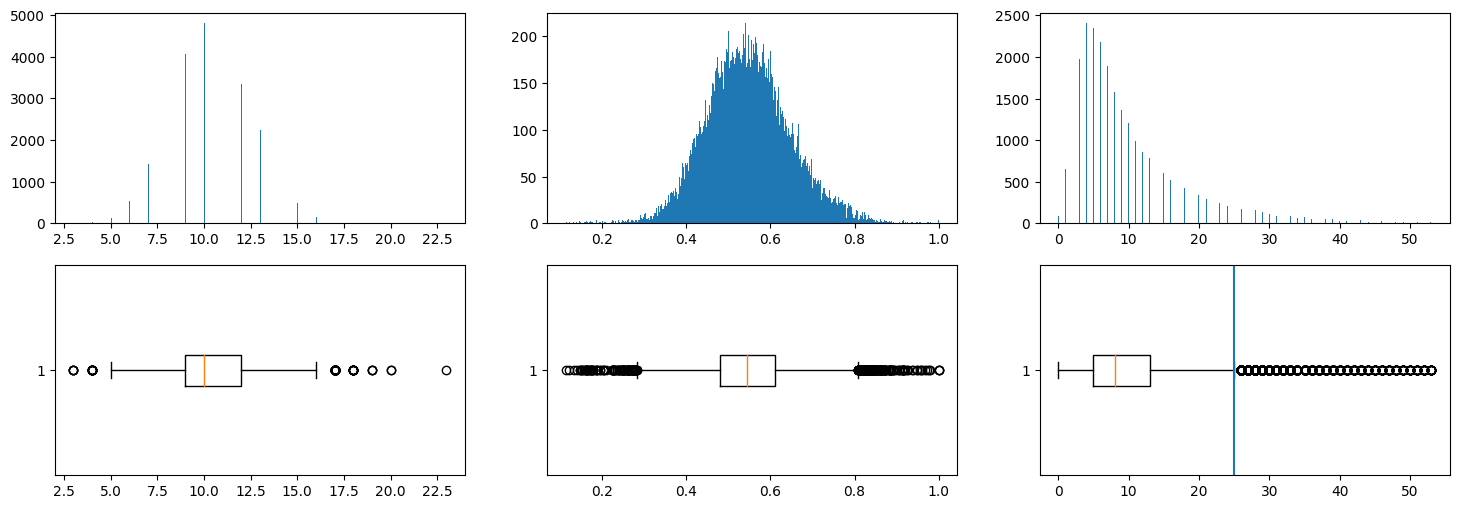

In [44]:
from sklearn.preprocessing import RobustScaler

fig, ax = plt.subplots(2, 3, figsize = (18, 6))


_ = ax[0, 0].hist(pr_X_train['n_tokens_title'], bins = 500)
_ = ax[0, 1].hist(pr_X_train['n_unique_tokens'], bins = 500)
_ = ax[0, 2].hist(np.expm1(pr_X_train['num_hrefs']), bins = 500)

_ = ax[1, 0].boxplot(pr_X_train['n_tokens_title'], vert = False)
_ = ax[1, 1].boxplot(pr_X_train['n_unique_tokens'], vert = False)
_ = ax[1, 2].boxplot(np.expm1(pr_X_train['num_hrefs']), vert = False)
_ = ax[1, 2].axvline(x = 25)

In [45]:
print(pr_X_train.shape[0])
# pr_X_train[pr_X_train['n_tokens_title'] < 5]['n_tokens_title']
# pr_X_train[(pr_X_train['n_unique_tokens'] >= 0.2) & (pr_X_train['n_unique_tokens'] <= 0.8)]['n_unique_tokens']
# pr_X_train[(pr_X_train['num_hrefs'] >= 0.2) & (pr_X_train['num_hrefs'] <= 3.6)]['n_unique_tokens']

25727


23415


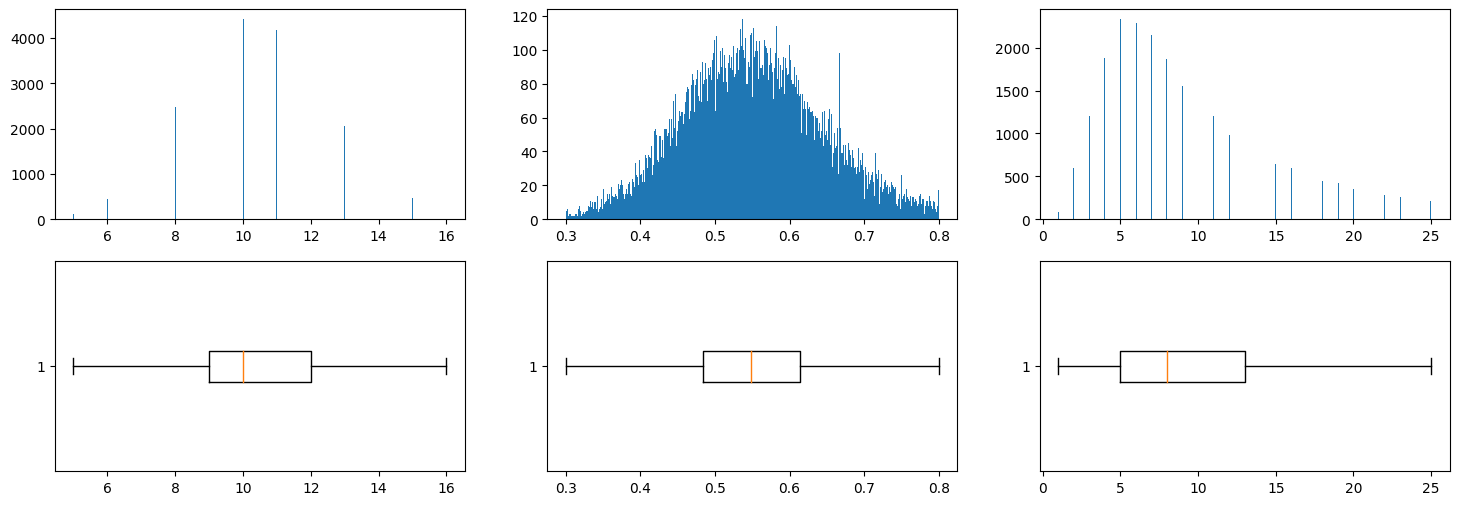

In [46]:
pr_X_train = pr_X_train[(pr_X_train['n_tokens_title'] >= 5) & (pr_X_train['n_tokens_title'] <= 16)]
pr_X_train = pr_X_train[(pr_X_train['n_unique_tokens'] >= 0.3) & (pr_X_train['n_unique_tokens'] <= 0.8)]
pr_X_train = pr_X_train[np.expm1(pr_X_train['num_hrefs']) <= 25]

print(pr_X_train.shape[0])

fig, ax = plt.subplots(2, 3, figsize = (18, 6))


_ = ax[0, 0].hist(pr_X_train['n_tokens_title'], bins = 500)
_ = ax[0, 1].hist(pr_X_train['n_unique_tokens'], bins = 500)
_ = ax[0, 2].hist(np.exp(pr_X_train['num_hrefs']), bins = 500)

_ = ax[1, 0].boxplot(pr_X_train['n_tokens_title'], vert = False)
_ = ax[1, 1].boxplot(pr_X_train['n_unique_tokens'], vert = False)
_ = ax[1, 2].boxplot(np.exp(pr_X_train['num_hrefs']), vert = False)

23415


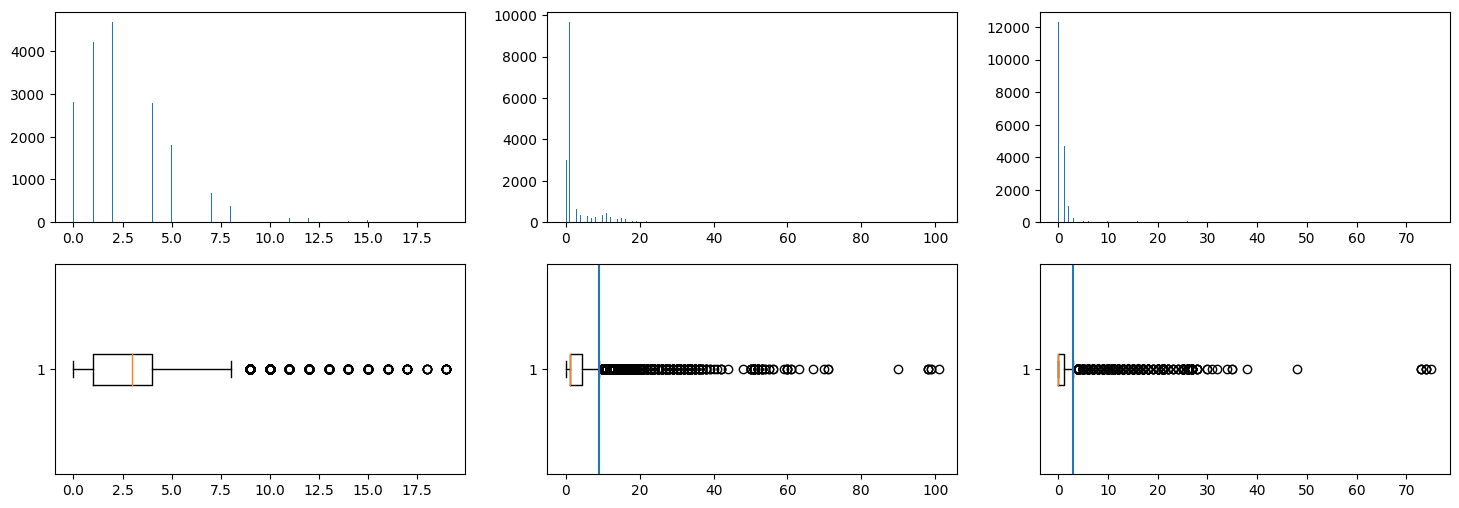

In [57]:
print(pr_X_train.shape[0])
fig, ax = plt.subplots(2, 3, figsize = (18, 6))


_ = ax[0, 0].hist(np.expm1(pr_X_train['num_self_hrefs']), bins = 500)
_ = ax[0, 1].hist(np.expm1(pr_X_train['num_imgs']), bins = 500)
_ = ax[0, 2].hist(np.expm1(pr_X_train['num_videos']), bins = 500)

_ = ax[1, 0].boxplot(np.expm1(pr_X_train['num_self_hrefs']), vert = False)
_ = ax[1, 1].boxplot(np.expm1(pr_X_train['num_imgs']), vert = False)
_ = ax[1, 1].axvline(x = 9)
_ = ax[1, 2].boxplot(np.expm1(pr_X_train['num_videos']), vert = False)
_ = ax[1, 2].axvline(x = 3)

18723


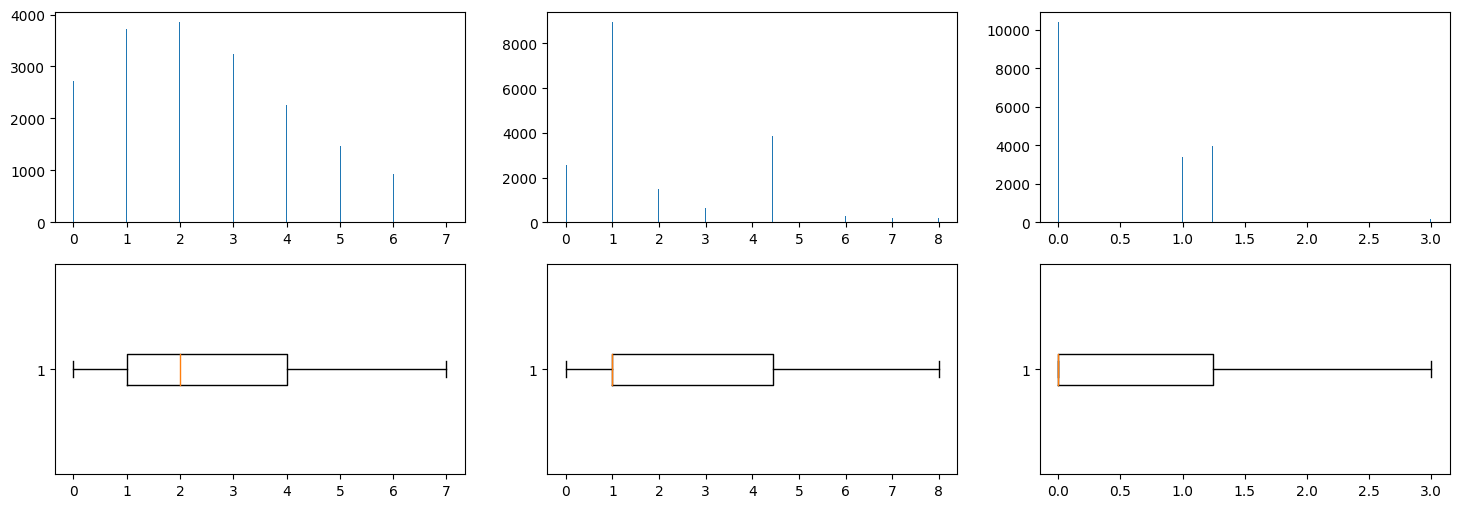

In [60]:
pr_X_train = pr_X_train[np.expm1(pr_X_train['num_self_hrefs']) <= 8]
pr_X_train = pr_X_train[np.expm1(pr_X_train['num_imgs']) <= 9]
pr_X_train = pr_X_train[np.expm1(pr_X_train['num_videos']) <= 3]

print(pr_X_train.shape[0])
fig, ax = plt.subplots(2, 3, figsize = (18, 6))


_ = ax[0, 0].hist(np.expm1(pr_X_train['num_self_hrefs']), bins = 500)
_ = ax[0, 1].hist(np.expm1(pr_X_train['num_imgs']), bins = 500)
_ = ax[0, 2].hist(np.expm1(pr_X_train['num_videos']), bins = 500)

_ = ax[1, 0].boxplot(np.expm1(pr_X_train['num_self_hrefs']), vert = False)
_ = ax[1, 1].boxplot(np.expm1(pr_X_train['num_imgs']), vert = False)
_ = ax[1, 2].boxplot(np.expm1(pr_X_train['num_videos']), vert = False)

18723


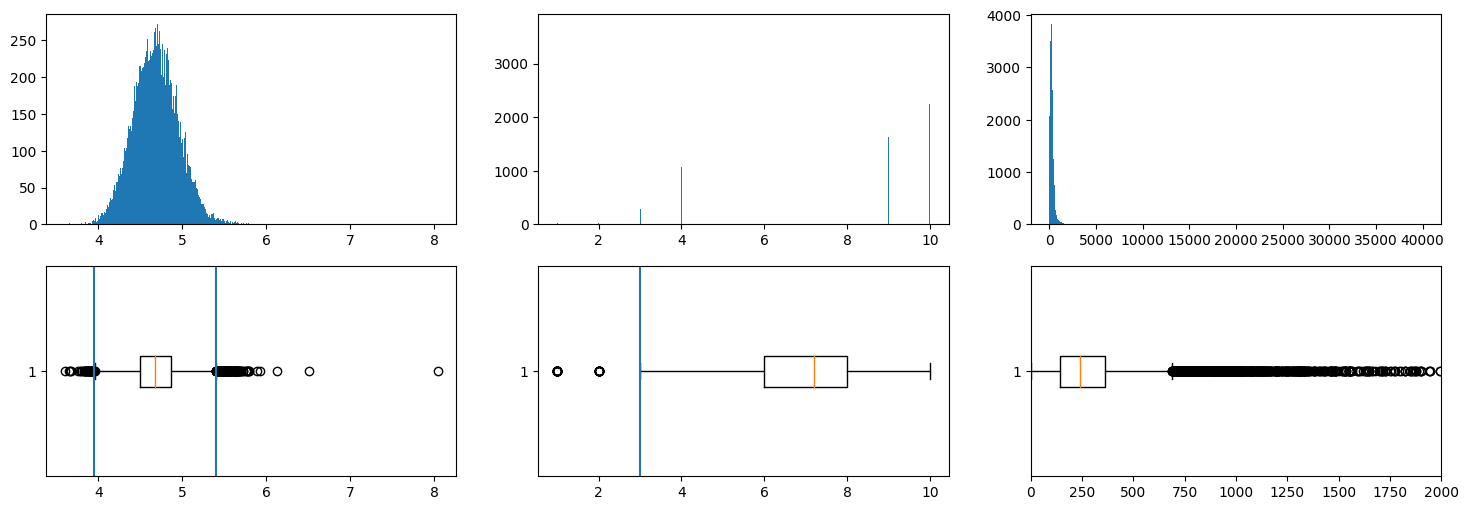

In [78]:
print(pr_X_train.shape[0])
fig, ax = plt.subplots(2, 3, figsize = (18, 6))

_ = ax[0, 0].hist(pr_X_train['average_token_length'], bins = 500)
_ = ax[0, 1].hist(pr_X_train['num_keywords'], bins = 500)
_ = ax[0, 2].hist(np.expm1(pr_X_train['kw_avg_min']), bins = 500)

_ = ax[1, 0].boxplot(pr_X_train['average_token_length'], vert = False)
_ = ax[1, 0].axvline(x = 3.95)
_ = ax[1, 0].axvline(x = 5.40)
_ = ax[1, 1].boxplot(pr_X_train['num_keywords'], vert = False)
_ = ax[1, 1].axvline(x = 3)
_ = ax[1, 2].boxplot(np.expm1(pr_X_train['kw_avg_min']), vert = False)
_ = ax[1, 2].set_xlim(0, 2000)

18723


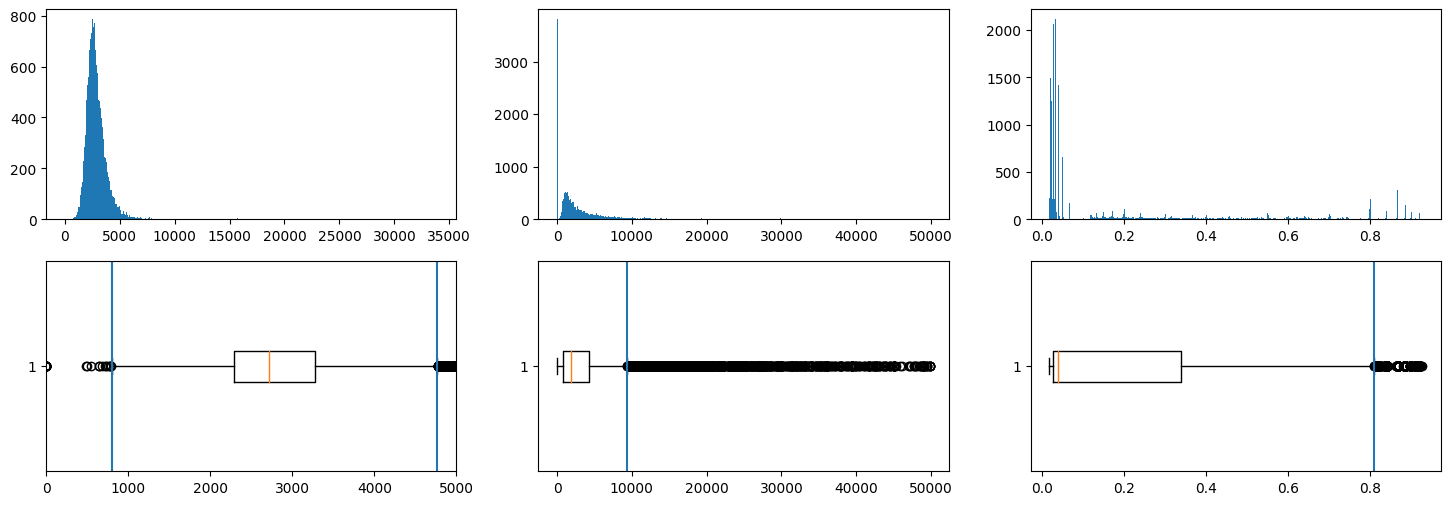

In [100]:
print(pr_X_train.shape[0])
fig, ax = plt.subplots(2, 3, figsize = (18, 6))

       
_ = ax[0, 0].hist(np.expm1(pr_X_train['kw_avg_avg']), bins = 500)
_ = ax[0, 1].hist(np.expm1(pr_X_train['self_reference_avg_sharess']), bins = 500)
_ = ax[0, 2].hist(pr_X_train['LDA_00'], bins = 500)

_ = ax[1, 0].boxplot(np.expm1(pr_X_train['kw_avg_avg']), vert = False)
_ = ax[1, 0].set_xlim(0, 5000)
_ = ax[1, 0].axvline(x = 800)
_ = ax[1, 0].axvline(x = 4760)
_ = ax[1, 1].boxplot(np.expm1(pr_X_train['self_reference_avg_sharess']), vert = False)
_ = ax[1, 1].axvline(x = 9400)
_ = ax[1, 2].boxplot(pr_X_train['LDA_00'], vert = False)
_ = ax[1, 2].axvline(x = 0.810)


18723


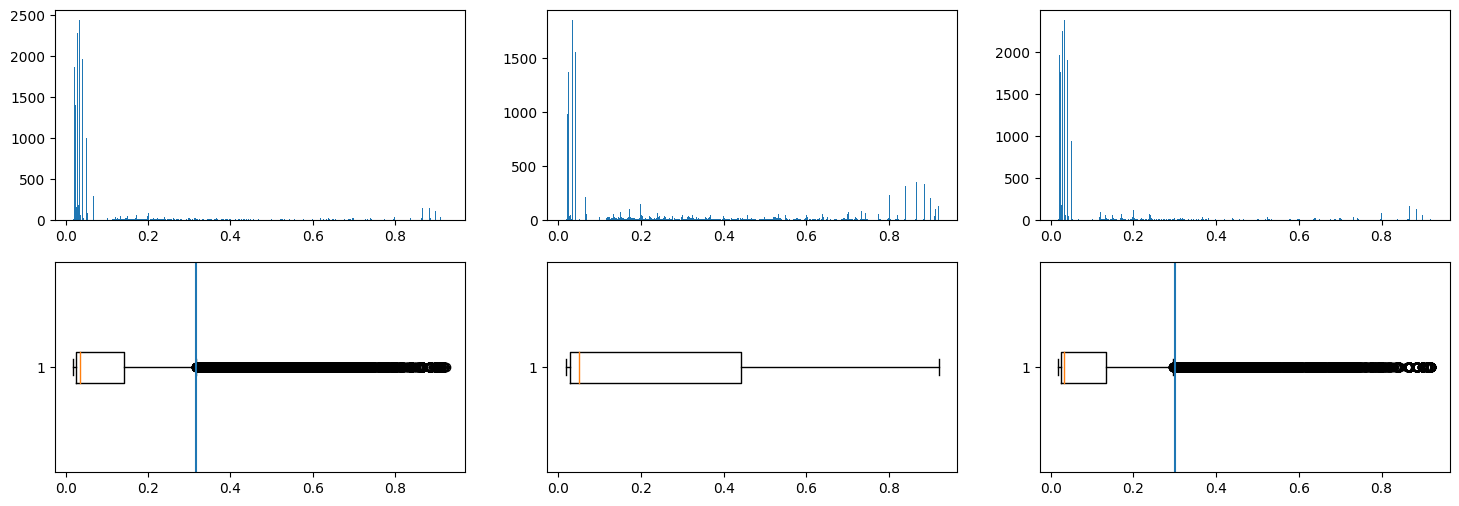

In [107]:
print(pr_X_train.shape[0])
fig, ax = plt.subplots(2, 3, figsize = (18, 6))

        
_ = ax[0, 0].hist(pr_X_train['LDA_03'], bins = 500)
_ = ax[0, 1].hist(pr_X_train['LDA_02'], bins = 500)
_ = ax[0, 2].hist(pr_X_train['LDA_01'], bins = 500)

_ = ax[1, 0].boxplot(pr_X_train['LDA_03'], vert = False)
_ = ax[1, 0].axvline(x = 0.315)
_ = ax[1, 1].boxplot(pr_X_train['LDA_02'], vert = False)
_ = ax[1, 2].boxplot(pr_X_train['LDA_01'], vert = False)
_ = ax[1, 2].axvline(x = 0.3)


18723


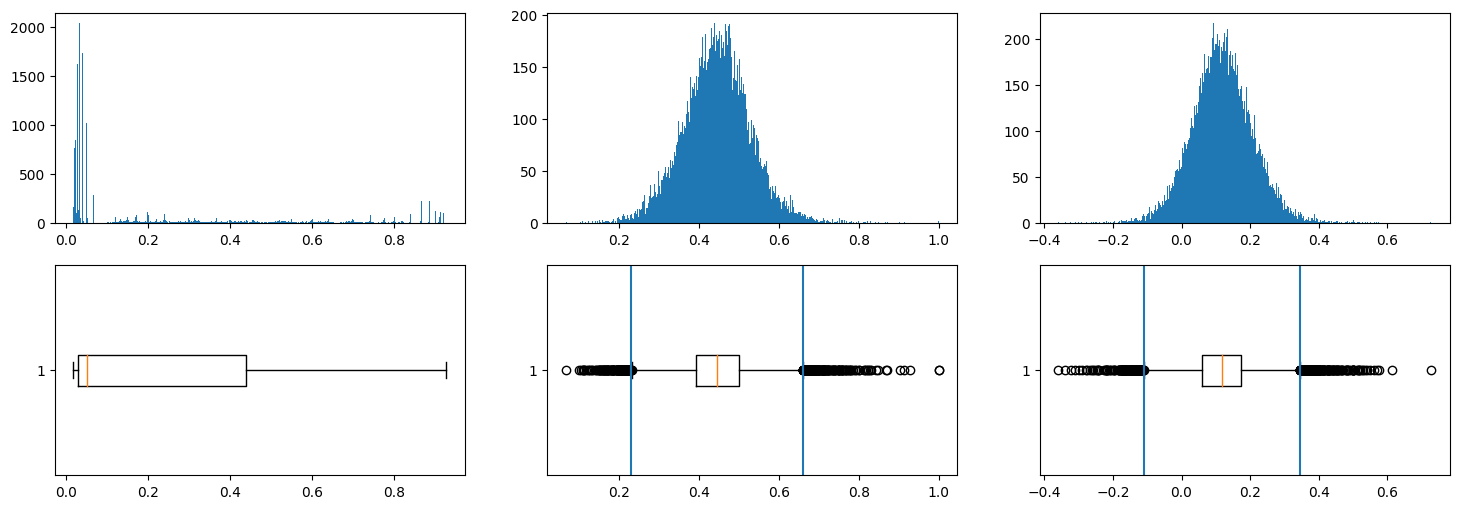

In [118]:
print(pr_X_train.shape[0])
fig, ax = plt.subplots(2, 3, figsize = (18, 6))

        
_ = ax[0, 0].hist(pr_X_train['LDA_04'], bins = 500)
_ = ax[0, 1].hist(pr_X_train['global_subjectivity'], bins = 500)
_ = ax[0, 2].hist(pr_X_train['global_sentiment_polarity'], bins = 500)

_ = ax[1, 0].boxplot(pr_X_train['LDA_04'], vert = False)
_ = ax[1, 1].boxplot(pr_X_train['global_subjectivity'], vert = False)
_ = ax[1, 1].axvline(x = 0.23)
_ = ax[1, 1].axvline(x = 0.66)
_ = ax[1, 2].boxplot(pr_X_train['global_sentiment_polarity'], vert = False)
_ = ax[1, 2].axvline(x = -0.11)
_ = ax[1, 2].axvline(x = 0.345)

In [119]:
pr_X_train.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_avg_min', 'kw_avg_avg',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'avg_negative_polarity', 'bus',
       'entertainment', 'lifestyle', 'socmed', 'tech', 'world', 'Not Weekend',
       'Weekend', 'kw_avg_max_high', 'kw_avg_max_medium', 'kw_avg_max_none',
       'no_subjectivity', 'low_subjectivity', 'medium_subjectvity',
       'high_subjectivity', 'high_negative_polarity', 'low_negative_polarity',
       'neutral_polarity', 'low_positive_polarity', 'high_positive_polarity'],
      dtype='object')

18723


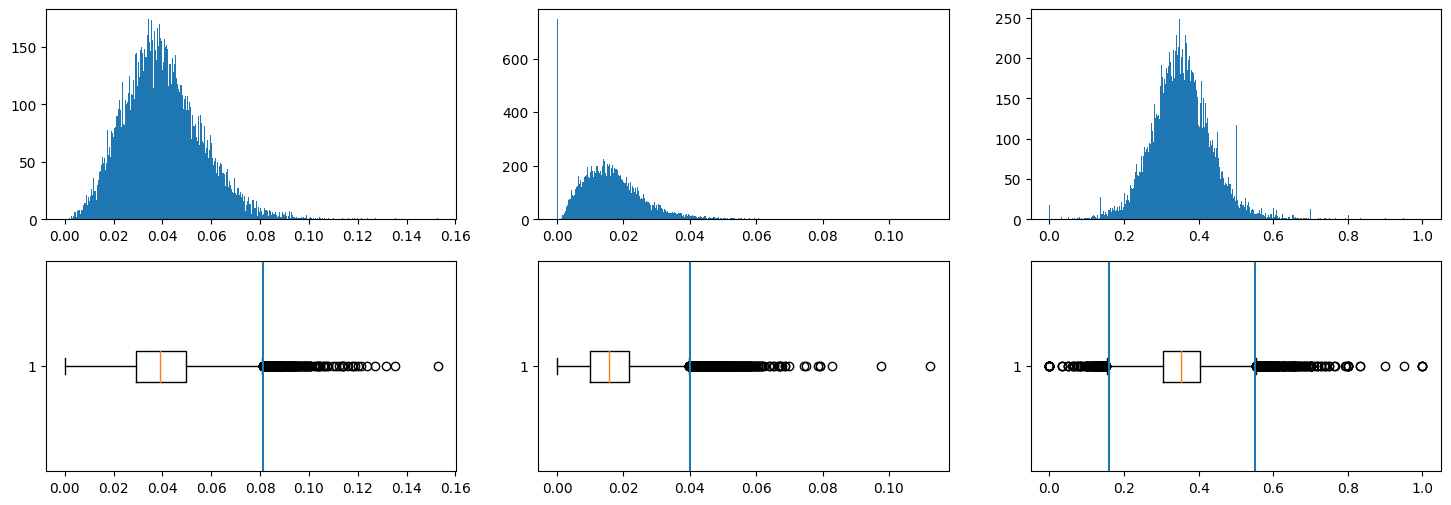

In [124]:
print(pr_X_train.shape[0])
fig, ax = plt.subplots(2, 3, figsize = (18, 6))

        
_ = ax[0, 0].hist(pr_X_train['global_rate_positive_words'], bins = 500)
_ = ax[0, 1].hist(pr_X_train['global_rate_negative_words'], bins = 500)
_ = ax[0, 2].hist(pr_X_train['avg_positive_polarity'], bins = 500)

_ = ax[1, 0].boxplot(pr_X_train['global_rate_positive_words'], vert = False)
_ = ax[1, 0].axvline(x = 0.081)
_ = ax[1, 1].boxplot(pr_X_train['global_rate_negative_words'], vert = False)
_ = ax[1, 1].axvline(x = 0.04)
_ = ax[1, 2].boxplot(pr_X_train['avg_positive_polarity'], vert = False)
_ = ax[1, 2].axvline(x = 0.16)
_ = ax[1, 2].axvline(x = 0.55)